# Playing with Attention Maps

In [1]:
from typing import Literal
import sys

import jax

platform : Literal["darwin", "colab", "cuda"] = "darwin"

try:
    import google.colab
    platform = "colab"
except ImportError:
    devices = jax.devices()
    if any(d.platform == "gpu" for d in devices):
        platform = "cuda"

print(f"Running on {platform}")

if platform == "colab":
    !git clone https://github.com/novastar53/jaxpt
    !cd jaxpt && git checkout main && git pull
    !pip install tiktoken --quiet
    !pip uninstall -y tensorflow

Running on darwin


In [12]:
import jax
import jax.numpy as jnp

from jaxpt.modules.attention import calc_vanilla_attn

key = jax.random.key(42)

B, T, C, nh = 1, 3, 8, 2 


mask =   jnp.tril(jnp.ones((1, 1, T, T)))

q = jax.random.uniform(key, (B, T, nh, C), minval=0, maxval=1)
key, subkey = jax.random.split(key)
k = jax.random.uniform(subkey, (B, T, nh, C), minval=0, maxval=1)
key, subkey = jax.random.split(key)
v = jax.random.uniform(subkey, (B, T, nh, C), minval=0, maxval=1)

_, att = calc_vanilla_attn(q, k, v, mask)

print(att.shape)

(1, 1, 3, 3)


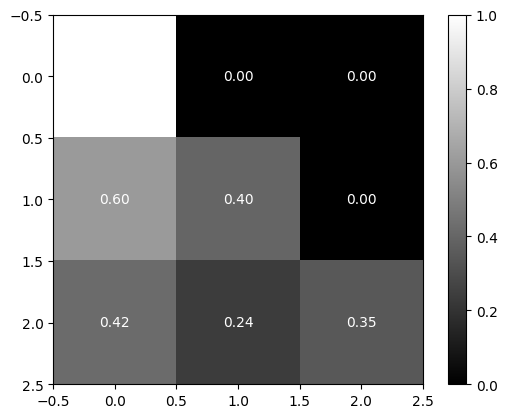

In [13]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(1, att.shape[1])
att = att.squeeze()

# annotate each cell with its value
for i in range(att.shape[0]):
    for j in range(att.shape[1]):
        ax.text(j, i,            # x, y position
                f"{att[i, j]:.2f}",  # text to display
                ha="center",    # horizontal alignment
                va="center",    # vertical alignment
                color="w")      # choose a contrasting color



plt.imshow(att, cmap="gray")
plt.colorbar()
plt.show()